In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

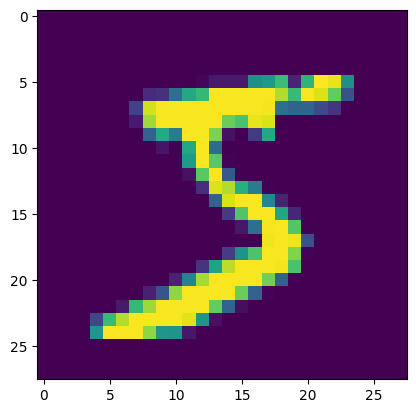

(60000, 28, 28)


In [11]:
fig = plt.figure
plt.imshow(x_train[0])
plt.show()
print(x_train.shape)

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
def graph(train_data, test_data, label):
    plt.plot(train_data, label=f'train {label}')
    plt.plot(test_data, label=f'test {label}')
    plt.title(f'Training & Validation {label}')
    plt.xlabel('epoch')
    plt.ylabel('value')
    plt.grid()
    plt.legend()
    plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax') 
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-03-28 13:46:04.307462: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2570 - accuracy: 0.9261 - val_loss: 0.1512 - val_accuracy: 0.9536
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1134 - accuracy: 0.9667 - val_loss: 0.1116 - val_accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9761 - val_loss: 0.0895 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9820 - val_loss: 0.0835 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0774 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0747 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0744 - val_accuracy: 0.9779
Epo

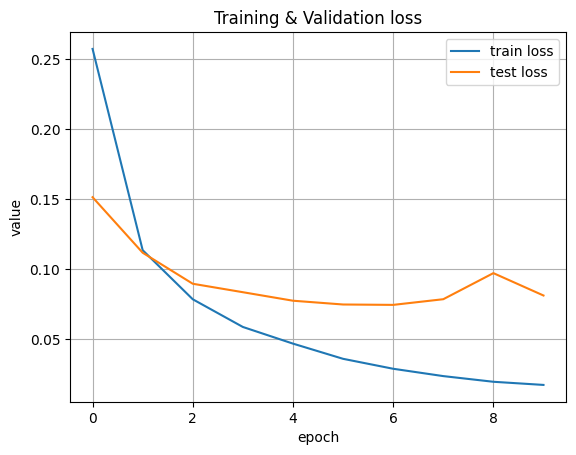

In [8]:
graph(history.history['loss'], history.history['val_loss'], 'loss')

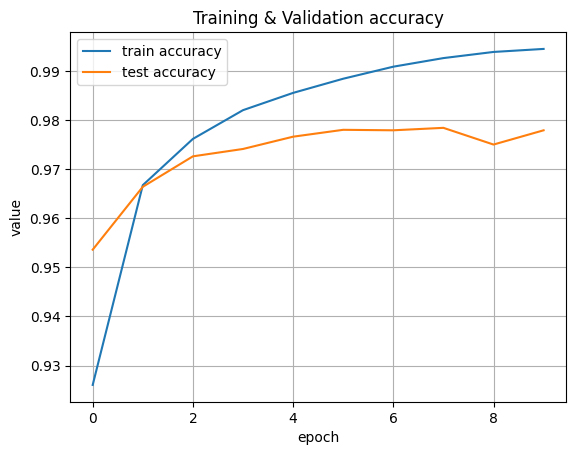

In [9]:
graph(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')